### 공기 데이터
- 공기 데이터를 차원축소하여 회귀분석하고 오염도를 예측한다.

In [94]:
import pandas as pd

a_df = pd.read_csv('./datasets/city_day.csv')
a_df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [95]:
a_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [96]:
a_df.AQI.isna().sum()

4681

타겟데이터에 결측치가 존재하기에 결측치 제거

In [97]:
a_df = a_df[~a_df['AQI'].isna()]
a_df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
28,Ahmedabad,2015-01-29,83.13,NaN,6.93,28.71,33.72,NaN,6.93,49.52,59.76,0.02,0.00,3.14,209.0,Poor
29,Ahmedabad,2015-01-30,79.84,NaN,13.85,28.68,41.08,NaN,13.85,48.49,97.07,0.04,0.00,4.81,328.0,Very Poor
30,Ahmedabad,2015-01-31,94.52,NaN,24.39,32.66,52.61,NaN,24.39,67.39,111.33,0.24,0.01,7.67,514.0,Severe
31,Ahmedabad,2015-02-01,135.99,NaN,43.48,42.08,84.57,NaN,43.48,75.23,102.70,0.40,0.04,25.87,782.0,Severe
32,Ahmedabad,2015-02-02,178.33,NaN,54.56,35.31,72.80,NaN,54.56,55.04,107.38,0.46,0.06,35.61,914.0,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [98]:
a_df = a_df.reset_index(drop=True)
a_df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-29,83.13,NaN,6.93,28.71,33.72,NaN,6.93,49.52,59.76,0.02,0.00,3.14,209.0,Poor
1,Ahmedabad,2015-01-30,79.84,NaN,13.85,28.68,41.08,NaN,13.85,48.49,97.07,0.04,0.00,4.81,328.0,Very Poor
2,Ahmedabad,2015-01-31,94.52,NaN,24.39,32.66,52.61,NaN,24.39,67.39,111.33,0.24,0.01,7.67,514.0,Severe
3,Ahmedabad,2015-02-01,135.99,NaN,43.48,42.08,84.57,NaN,43.48,75.23,102.70,0.40,0.04,25.87,782.0,Severe
4,Ahmedabad,2015-02-02,178.33,NaN,54.56,35.31,72.80,NaN,54.56,55.04,107.38,0.46,0.06,35.61,914.0,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24845,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
24846,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
24847,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
24848,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [99]:
a_df.City.value_counts()

City
Delhi                 1999
Bengaluru             1910
Lucknow               1893
Chennai               1884
Hyderabad             1880
Patna                 1459
Gurugram              1453
Ahmedabad             1334
Visakhapatnam         1171
Amritsar              1126
Jaipur                1094
Thiruvananthapuram    1052
Amaravati              841
Mumbai                 775
Jorapokhar             771
Kolkata                754
Brajrajnagar           713
Talcher                698
Guwahati               495
Coimbatore             344
Chandigarh             299
Bhopal                 278
Shillong               205
Kochi                  158
Ernakulam              153
Aizawl                 111
Name: count, dtype: int64

### 도시별 평균오염도 시각화

In [100]:
group_city_df = a_df[['City', 'AQI']].groupby('City').mean('AQI').reset_index()
group_city_df

,City,AQI
0,Ahmedabad,452.122939
1,Aizawl,34.765766
2,Amaravati,95.299643
3,Amritsar,119.920959
4,Bengaluru,94.318325
5,Bhopal,132.827338
6,Brajrajnagar,150.280505
7,Chandigarh,96.498328
8,Chennai,114.502654
9,Coimbatore,73.023256


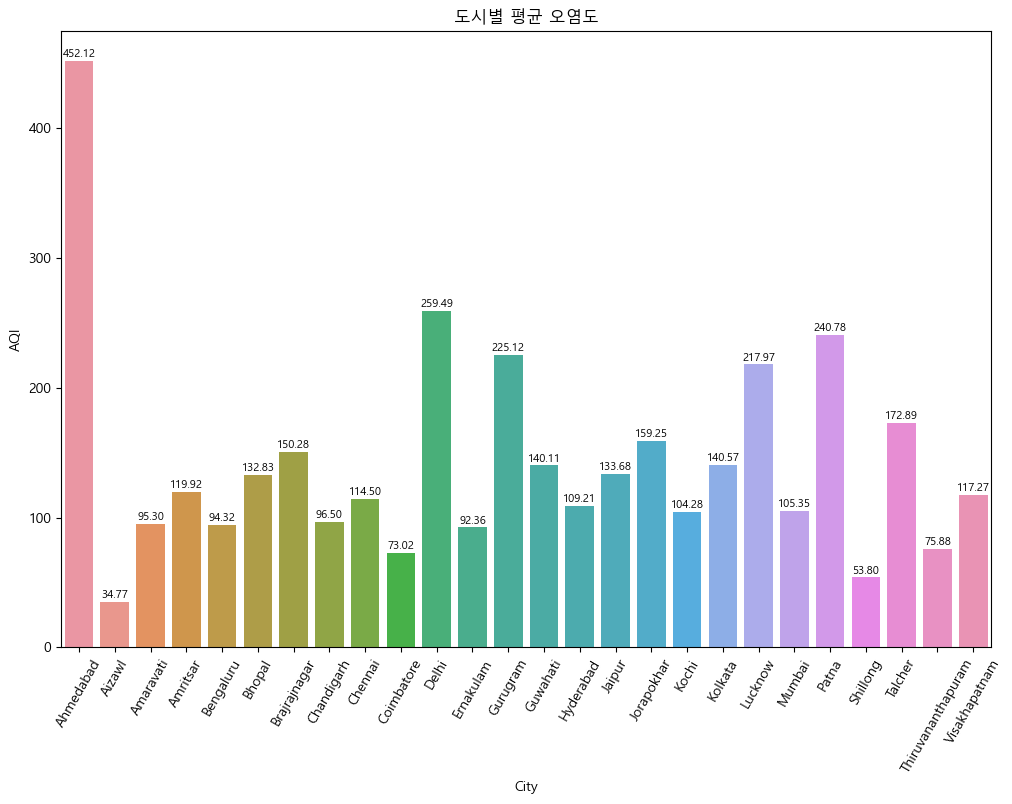

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(12,8))
ax = sns.barplot(x='City', y='AQI', data=group_city_df)
plt.xticks(rotation=60)
plt.title('도시별 평균 오염도')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2.,
                 p.get_height()), ha='center', va='center', fontsize=8, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.show()

### 연도별 평균 오염도 시각화

In [102]:
a_df['Date'].dtype

dtype('O')

In [103]:
group_date_df = a_df[['Date', 'AQI']].groupby('Date').mean('AQI').reset_index()
group_date_df

,Date,AQI
0,2015-01-01,472.00
1,2015-01-02,454.00
2,2015-01-03,143.00
3,2015-01-04,319.00
4,2015-01-05,325.00
...,...,...
2004,2020-06-27,72.60
2005,2020-06-28,77.48
2006,2020-06-29,76.40
2007,2020-06-30,70.40


In [104]:
group_date_df['Date'] = pd.to_datetime(group_date_df['Date'], format='%Y-%m-%d')

In [105]:
group_date_df.Date.dtype

dtype('<M8[ns]')

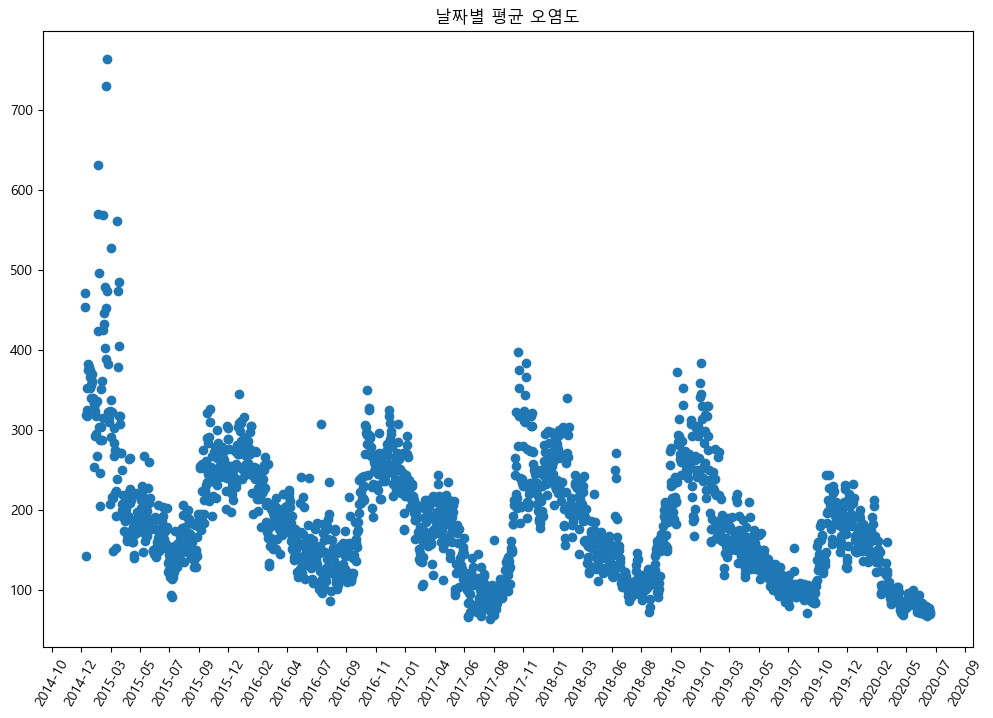

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots(figsize=(12,8))

date_format = mdates.DateFormatter('%Y-%m')
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=10))
ax.xaxis.set_major_formatter(date_format)
plt.scatter(group_date_df.Date, group_date_df['AQI'])
plt.xticks(rotation=60)
plt.title('날짜별 평균 오염도')
plt.show()

In [107]:
a_df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-29,83.13,NaN,6.93,28.71,33.72,NaN,6.93,49.52,59.76,0.02,0.00,3.14,209.0,Poor
1,Ahmedabad,2015-01-30,79.84,NaN,13.85,28.68,41.08,NaN,13.85,48.49,97.07,0.04,0.00,4.81,328.0,Very Poor
2,Ahmedabad,2015-01-31,94.52,NaN,24.39,32.66,52.61,NaN,24.39,67.39,111.33,0.24,0.01,7.67,514.0,Severe
3,Ahmedabad,2015-02-01,135.99,NaN,43.48,42.08,84.57,NaN,43.48,75.23,102.70,0.40,0.04,25.87,782.0,Severe
4,Ahmedabad,2015-02-02,178.33,NaN,54.56,35.31,72.80,NaN,54.56,55.04,107.38,0.46,0.06,35.61,914.0,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24845,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
24846,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
24847,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
24848,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [108]:
pre_a_df = a_df.drop(labels=['City', 'Date'], axis=1)

In [109]:
pre_a_df

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,83.13,NaN,6.93,28.71,33.72,NaN,6.93,49.52,59.76,0.02,0.00,3.14,209.0,Poor
1,79.84,NaN,13.85,28.68,41.08,NaN,13.85,48.49,97.07,0.04,0.00,4.81,328.0,Very Poor
2,94.52,NaN,24.39,32.66,52.61,NaN,24.39,67.39,111.33,0.24,0.01,7.67,514.0,Severe
3,135.99,NaN,43.48,42.08,84.57,NaN,43.48,75.23,102.70,0.40,0.04,25.87,782.0,Severe
4,178.33,NaN,54.56,35.31,72.80,NaN,54.56,55.04,107.38,0.46,0.06,35.61,914.0,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24845,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
24846,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
24847,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
24848,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [110]:
pre_a_df = pre_a_df.drop(labels=['AQI_Bucket'], axis=1)
pre_a_df

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,83.13,NaN,6.93,28.71,33.72,NaN,6.93,49.52,59.76,0.02,0.00,3.14,209.0
1,79.84,NaN,13.85,28.68,41.08,NaN,13.85,48.49,97.07,0.04,0.00,4.81,328.0
2,94.52,NaN,24.39,32.66,52.61,NaN,24.39,67.39,111.33,0.24,0.01,7.67,514.0
3,135.99,NaN,43.48,42.08,84.57,NaN,43.48,75.23,102.70,0.40,0.04,25.87,782.0
4,178.33,NaN,54.56,35.31,72.80,NaN,54.56,55.04,107.38,0.46,0.06,35.61,914.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24845,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0
24846,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0
24847,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0
24848,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0


In [111]:
pre_a_df.isna().sum()

PM2.5        678
PM10        7086
NO           387
NO2          391
NOx         1857
NH3         6536
CO           445
SO2          605
O3           807
Benzene     3535
Toluene     5826
Xylene     15372
AQI            0
dtype: int64

결측치 처리

In [112]:
pre_a_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,24172.0,67.476613,63.075398,0.04,29.0000,48.785,80.9250,914.94
PM10,17764.0,118.454435,89.487976,0.03,56.7775,96.180,150.1825,917.08
NO,24463.0,17.622421,22.421138,0.03,5.6600,9.910,20.0300,390.68
NO2,24459.0,28.978391,24.627054,0.01,11.9400,22.100,38.2400,362.21
NOx,22993.0,32.289012,30.712855,0.00,13.1100,23.680,40.1700,378.24
NH3,18314.0,23.848366,25.875981,0.01,8.9600,16.310,30.3600,352.89
CO,24405.0,2.345267,7.075208,0.00,0.5900,0.930,1.4800,175.81
SO2,24245.0,14.362933,17.428693,0.01,5.7300,9.220,15.1400,186.08
O3,24043.0,34.912885,21.724525,0.01,19.2500,31.250,46.0800,257.73
Benzene,21315.0,3.458668,16.036020,0.00,0.2300,1.290,3.3400,455.03


In [113]:
pre_a_df.Xylene.value_counts()

Xylene
0.00     299
0.10     242
2.00     142
0.65     116
0.12     103
        ... 
5.03       1
9.89       1
9.61       1
47.40      1
12.41      1
Name: count, Length: 1547, dtype: int64

<Axes: >

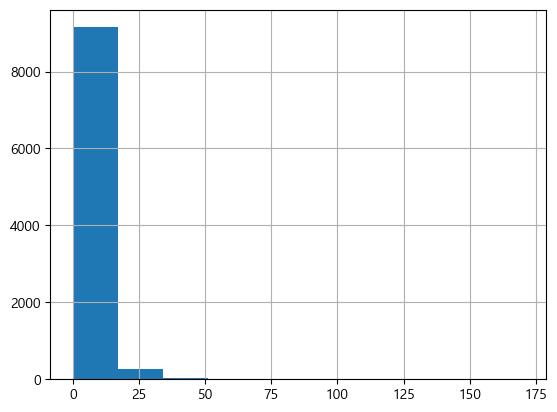

In [114]:
pre_a_df.Xylene.hist()

중간값으로 처리할 수 있는 값들 :
- O3, NO2

In [115]:
pre_a_df['O3'] = pre_a_df['O3'].fillna(pre_a_df['O3'].median())

In [116]:
pre_a_df.isna().sum()

PM2.5        678
PM10        7086
NO           387
NO2          391
NOx         1857
NH3         6536
CO           445
SO2          605
O3             0
Benzene     3535
Toluene     5826
Xylene     15372
AQI            0
dtype: int64

In [117]:
pre_a_df['NO2'] = pre_a_df['NO2'].fillna(pre_a_df['NO2'].median())

In [118]:
pre_a_df.isna().sum()

PM2.5        678
PM10        7086
NO           387
NO2            0
NOx         1857
NH3         6536
CO           445
SO2          605
O3             0
Benzene     3535
Toluene     5826
Xylene     15372
AQI            0
dtype: int64

나머지 결측치는 제거

In [119]:
for column in pre_a_df.columns:
    pre_a_df = pre_a_df[~pre_a_df[column].isna()]

In [120]:
pre_a_df.reset_index(drop=True, inplace=True)

In [121]:
pre_a_df

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0
1,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0
2,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0
3,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0
4,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6412,7.63,32.27,5.91,23.27,17.19,11.15,0.46,6.87,19.90,1.45,5.37,1.45,47.0
6413,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0
6414,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0
6415,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0


array([[<Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'PM10'}>, <Axes: title={'center': 'NO'}>,
        <Axes: title={'center': 'NO2'}>],
       [<Axes: title={'center': 'NOx'}>, <Axes: title={'center': 'NH3'}>,
        <Axes: title={'center': 'CO'}>, <Axes: title={'center': 'SO2'}>],
       [<Axes: title={'center': 'O3'}>,
        <Axes: title={'center': 'Benzene'}>,
        <Axes: title={'center': 'Toluene'}>,
        <Axes: title={'center': 'Xylene'}>],
       [<Axes: title={'center': 'AQI'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

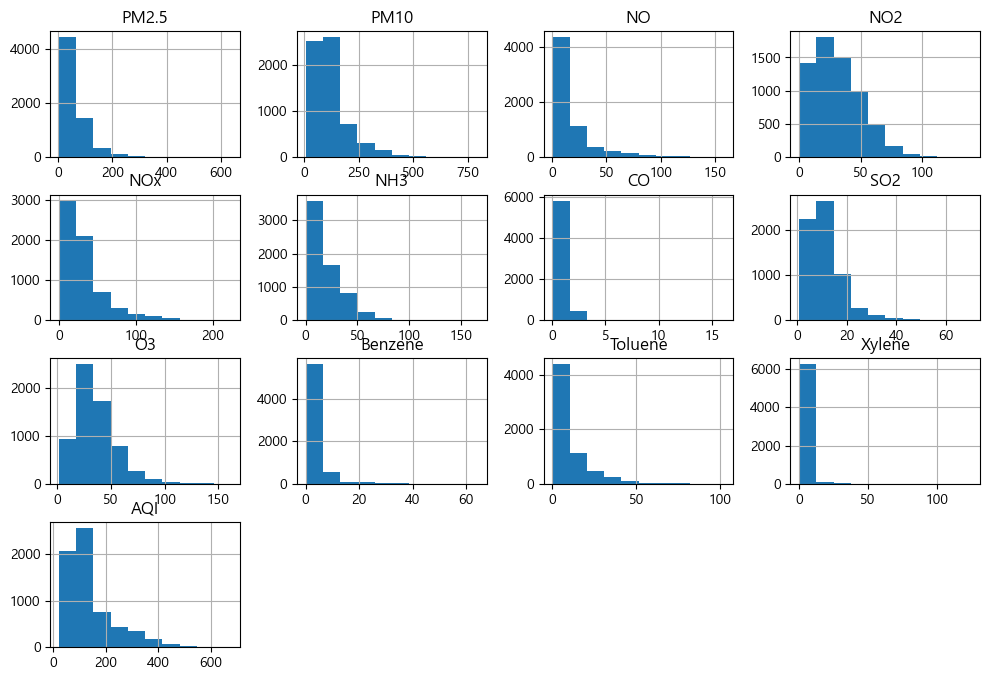

In [122]:
pre_a_df.hist(figsize=(12,8))

챠원축소하기 전, 먼저 OLS 및 vif 확인

In [123]:
from statsmodels.api import OLS

features, targets = pre_a_df.iloc[:, :-1], pre_a_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                    AQI   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                          1.829e+04
Date:                Mon, 13 May 2024   Prob (F-statistic):                        0.00
Time:                        11:38:01   Log-Likelihood:                         -30508.
No. Observations:                6417   AIC:                                  6.104e+04
Df Residuals:                    6405   BIC:                                  6.112e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

차원축소를 진행하기전 데이터의 편향을 일반화 해주기 위해 표준화 작업 진행

In [124]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
result = std.fit_transform(pre_a_df.iloc[:, :-1])
std_pre_a_df = pd.DataFrame(result, columns=pre_a_df.iloc[:, :-1].columns)
std_pre_a_df

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
0,0.393622,0.034541,-0.770237,-0.561609,-0.730534,-0.613262,-0.654089,0.547969,4.707493,-0.682503,-0.293226,-0.543699
1,0.335836,0.087915,-0.779081,-0.270627,-0.629812,-0.640304,-0.639188,2.179611,4.208567,-0.678514,-0.174387,-0.539243
2,0.531707,0.161186,-0.516717,-0.014033,-0.378189,-0.478669,-0.661540,3.102629,3.917485,-0.664555,-0.200614,-0.530330
3,0.070548,-0.204352,-0.715209,-0.161112,-0.551271,-0.570242,-0.676442,1.071431,5.280869,-0.688485,-0.414523,-0.541471
4,0.226081,-0.078526,-0.584027,-0.418763,-0.566543,-0.519232,-0.624286,-0.104965,3.810461,-0.680508,-0.439930,-0.539243
...,...,...,...,...,...,...,...,...,...,...,...,...
6412,-0.990420,-1.044985,-0.550618,-0.415060,-0.544726,-0.586835,-0.400762,-0.617290,-0.834455,-0.433224,-0.385838,-0.233972
6413,-0.851772,-0.826458,-0.463654,-0.320358,-0.459275,-0.505711,-0.393311,-0.383402,-0.658668,-0.275680,0.163279,-0.394406
6414,-0.676163,-0.555494,-0.672956,-0.267452,-0.568724,-0.535211,-0.356057,0.197139,-0.305026,-0.574814,-0.644825,-0.472395
6415,-0.703743,-0.653345,-0.671482,-0.083869,-0.503273,-0.613877,-0.385860,-0.401501,-0.262630,-0.720393,-0.825132,-0.557069


이상치 제거

In [125]:
for column in std_pre_a_df.columns:
    std_pre_a_df = std_pre_a_df[std_pre_a_df[column].between(-1.96, 1.96)]

std_pre_a_df

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
13,1.171852,1.021952,-0.567814,1.256765,0.055970,-0.168307,-0.542327,1.624129,1.683437,-0.650595,-0.311257,-0.510275
14,0.260040,0.230244,-0.541283,0.732997,-0.119657,-0.305358,-0.676442,1.475165,1.270854,-0.670537,-0.433374,-0.521417
15,-0.189488,-0.219802,-0.755989,0.144684,-0.464003,-0.500180,-0.668991,0.326612,1.660171,-0.682503,-0.474353,-0.534786
16,-0.036581,-0.073493,-0.598767,0.556821,-0.218924,-0.337931,-0.624286,0.983723,1.949703,-0.676520,-0.374364,-0.521417
17,0.542777,0.116240,-0.449406,0.581158,-0.119657,0.033275,-0.564680,-0.540719,0.446206,-0.666549,-0.251428,-0.514732
...,...,...,...,...,...,...,...,...,...,...,...,...
6412,-0.990420,-1.044985,-0.550618,-0.415060,-0.544726,-0.586835,-0.400762,-0.617290,-0.834455,-0.433224,-0.385838,-0.233972
6413,-0.851772,-0.826458,-0.463654,-0.320358,-0.459275,-0.505711,-0.393311,-0.383402,-0.658668,-0.275680,0.163279,-0.394406
6414,-0.676163,-0.555494,-0.672956,-0.267452,-0.568724,-0.535211,-0.356057,0.197139,-0.305026,-0.574814,-0.644825,-0.472395
6415,-0.703743,-0.653345,-0.671482,-0.083869,-0.503273,-0.613877,-0.385860,-0.401501,-0.262630,-0.720393,-0.825132,-0.557069


In [126]:
std_pre_a_df.loc[:, 'target'] = pre_a_df.loc[std_pre_a_df.index, 'AQI']
std_pre_a_df

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,target
13,1.171852,1.021952,-0.567814,1.256765,0.055970,-0.168307,-0.542327,1.624129,1.683437,-0.650595,-0.311257,-0.510275,310.0
14,0.260040,0.230244,-0.541283,0.732997,-0.119657,-0.305358,-0.676442,1.475165,1.270854,-0.670537,-0.433374,-0.521417,196.0
15,-0.189488,-0.219802,-0.755989,0.144684,-0.464003,-0.500180,-0.668991,0.326612,1.660171,-0.682503,-0.474353,-0.534786,132.0
16,-0.036581,-0.073493,-0.598767,0.556821,-0.218924,-0.337931,-0.624286,0.983723,1.949703,-0.676520,-0.374364,-0.521417,147.0
17,0.542777,0.116240,-0.449406,0.581158,-0.119657,0.033275,-0.564680,-0.540719,0.446206,-0.666549,-0.251428,-0.514732,179.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6412,-0.990420,-1.044985,-0.550618,-0.415060,-0.544726,-0.586835,-0.400762,-0.617290,-0.834455,-0.433224,-0.385838,-0.233972,47.0
6413,-0.851772,-0.826458,-0.463654,-0.320358,-0.459275,-0.505711,-0.393311,-0.383402,-0.658668,-0.275680,0.163279,-0.394406,41.0
6414,-0.676163,-0.555494,-0.672956,-0.267452,-0.568724,-0.535211,-0.356057,0.197139,-0.305026,-0.574814,-0.644825,-0.472395,70.0
6415,-0.703743,-0.653345,-0.671482,-0.083869,-0.503273,-0.613877,-0.385860,-0.401501,-0.262630,-0.720393,-0.825132,-0.557069,68.0


In [127]:
pre_a_df = pre_a_df.iloc[std_pre_a_df.index]
pre_a_df

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
13,122.88,208.86,5.56,54.87,33.71,17.96,0.27,22.97,68.60,0.36,6.28,0.21,310.0
14,74.28,141.22,6.10,44.97,28.88,15.73,0.09,21.90,60.62,0.26,4.79,0.16,196.0
15,50.32,102.77,1.73,33.85,19.41,12.56,0.10,13.65,68.15,0.20,4.29,0.10,132.0
16,58.47,115.27,4.93,41.64,26.15,15.20,0.16,18.37,73.75,0.23,5.51,0.16,147.0
17,89.35,131.48,7.97,42.10,28.88,21.24,0.24,7.42,44.67,0.28,7.01,0.19,179.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6412,7.63,32.27,5.91,23.27,17.19,11.15,0.46,6.87,19.90,1.45,5.37,1.45,47.0
6413,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0
6414,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0
6415,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0


In [128]:
pre_a_df.reset_index(drop=True, inplace=True)

In [129]:
from statsmodels.api import OLS

features, targets = pre_a_df.iloc[:, :-1], pre_a_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                    AQI   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                          1.277e+04
Date:                Mon, 13 May 2024   Prob (F-statistic):                        0.00
Time:                        11:38:01   Log-Likelihood:                         -21012.
No. Observations:                4682   AIC:                                  4.205e+04
Df Residuals:                    4670   BIC:                                  4.213e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [130]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [131]:
get_vif(features)

,vif_score,feature
0,13.726200,PM2.5
1,21.229198,PM10
2,8.030528,NO
3,10.173225,NO2
4,20.795170,NOx
5,4.533450,NH3
6,5.286970,CO
7,5.039678,SO2
8,6.019697,O3
9,3.534818,Benzene


In [132]:
corr = pre_a_df.corr()
corr['AQI'].sort_values(ascending=False)[1:]

PM2.5      0.901667
PM10       0.860729
NOx        0.556965
NO         0.464271
NO2        0.463177
CO         0.463102
NH3        0.434899
O3         0.329240
Toluene    0.317693
SO2        0.262823
Benzene    0.215058
Xylene     0.036649
Name: AQI, dtype: float64

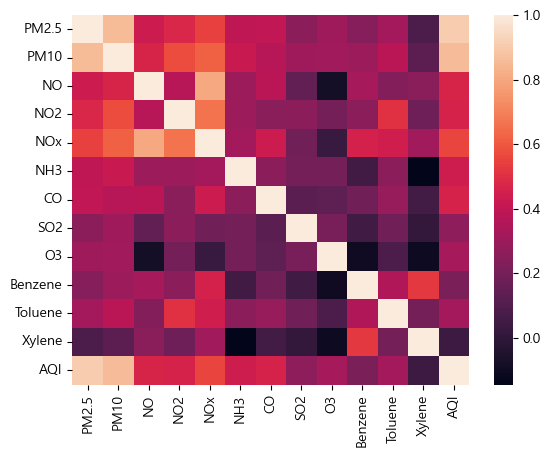

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(corr)
plt.show()

In [134]:
pre_a_df = pre_a_df.drop(labels=['NOx'], axis=1)
pre_a_df

,PM2.5,PM10,NO,NO2,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,122.88,208.86,5.56,54.87,17.96,0.27,22.97,68.60,0.36,6.28,0.21,310.0
1,74.28,141.22,6.10,44.97,15.73,0.09,21.90,60.62,0.26,4.79,0.16,196.0
2,50.32,102.77,1.73,33.85,12.56,0.10,13.65,68.15,0.20,4.29,0.10,132.0
3,58.47,115.27,4.93,41.64,15.20,0.16,18.37,73.75,0.23,5.51,0.16,147.0
4,89.35,131.48,7.97,42.10,21.24,0.24,7.42,44.67,0.28,7.01,0.19,179.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4677,7.63,32.27,5.91,23.27,11.15,0.46,6.87,19.90,1.45,5.37,1.45,47.0
4678,15.02,50.94,7.68,25.06,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0
4679,24.38,74.09,3.42,26.06,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0
4680,22.91,65.73,3.45,29.53,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0


In [135]:
from statsmodels.api import OLS

features, targets = pre_a_df.iloc[:, :-1], pre_a_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                    AQI   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                          1.394e+04
Date:                Mon, 13 May 2024   Prob (F-statistic):                        0.00
Time:                        11:38:10   Log-Likelihood:                         -21012.
No. Observations:                4682   AIC:                                  4.205e+04
Df Residuals:                    4671   BIC:                                  4.212e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [136]:
get_vif(features)

,vif_score,feature
0,13.723330,PM2.5
1,21.000557,PM10
2,3.832583,NO
3,7.332162,NO2
4,4.528333,NH3
5,5.177311,CO
6,5.013397,SO2
7,5.992990,O3
8,3.368735,Benzene
9,2.936379,Toluene


In [137]:
get_vif(features.drop(labels=['PM10'], axis=1))

,vif_score,feature
0,6.241874,PM2.5
1,3.767391,NO
2,6.846342,NO2
3,4.476917,NH3
4,5.175590,CO
5,4.941215,SO2
6,5.861759,O3
7,3.319930,Benzene
8,2.934673,Toluene
9,2.396789,Xylene


In [138]:
pre_a_df = pre_a_df.drop(labels=['PM10'], axis=1)

In [139]:
from statsmodels.api import OLS

features, targets = pre_a_df.iloc[:, :-1], pre_a_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                    AQI   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                          1.308e+04
Date:                Mon, 13 May 2024   Prob (F-statistic):                        0.00
Time:                        11:45:58   Log-Likelihood:                         -21372.
No. Observations:                4682   AIC:                                  4.276e+04
Df Residuals:                    4672   BIC:                                  4.283e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

분류에서는 PCA를 사용해서 차원축소를 진행

In [140]:
from sklearn.decomposition import PCA

for i in range(5):
    pca = PCA(n_components=(i + 1))
    
    pca_train = pca.fit_transform(features)
    pca_test = pca.fit_transform(features)

    print(pca.explained_variance_ratio_.sum())

0.6063874479175726
0.7401492500786984
0.8517531790734267
0.9164037023326855
0.9547868008594513


In [145]:
from sklearn.model_selection import train_test_split

features, targets = pre_a_df.iloc[:, :-1], pre_a_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

In [146]:
train_df = pd.concat([X_train, y_train], axis=1).reset_index(drop=True)
test_df = pd.concat([X_test, y_test], axis=1).reset_index(drop=True)

In [147]:
display(train_df)
display(test_df)

,PM2.5,NO,NO2,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,17.84,2.10,3.50,3.44,1.25,3.41,31.25,0.27,0.56,0.00,70.0
1,66.22,11.97,58.99,11.85,0.11,8.24,37.59,5.64,17.09,3.09,141.0
2,72.21,6.30,26.12,3.42,2.16,3.34,25.49,4.92,7.25,8.95,122.0
3,62.77,4.93,10.25,10.39,0.89,4.77,50.96,0.54,4.25,0.40,120.0
4,49.66,3.23,29.88,11.38,1.08,8.97,59.28,4.79,8.17,1.33,94.0
...,...,...,...,...,...,...,...,...,...,...,...
3740,29.92,6.62,23.70,16.42,0.66,10.11,17.16,0.90,6.50,1.45,70.0
3741,41.63,14.03,18.15,5.83,0.01,4.66,16.80,2.56,1.81,1.52,132.0
3742,30.12,17.86,10.34,11.93,0.84,9.34,31.26,1.43,1.88,2.00,78.0
3743,12.51,2.71,6.60,14.61,0.86,9.47,28.28,0.10,0.02,0.10,53.0


,PM2.5,NO,NO2,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,55.61,10.14,44.59,11.12,1.06,10.45,53.68,3.19,4.93,1.32,104.0
1,12.20,3.48,12.34,12.93,0.38,7.72,13.70,0.07,0.42,0.01,35.0
2,27.12,3.71,23.35,13.29,0.84,7.37,54.39,2.70,7.35,1.10,69.0
3,17.45,18.70,11.40,12.66,0.70,7.76,42.81,1.38,1.47,1.98,45.0
4,115.16,34.79,51.05,31.90,1.30,11.11,36.80,4.36,28.70,3.30,254.0
...,...,...,...,...,...,...,...,...,...,...,...
932,14.36,9.13,24.08,20.08,0.08,4.09,46.26,0.01,0.50,0.11,84.0
933,90.15,11.15,50.13,12.76,0.95,10.94,32.96,0.00,0.00,0.00,228.0
934,31.19,15.41,24.72,32.42,0.82,10.82,18.25,1.16,25.82,0.04,86.0
935,29.31,3.63,4.14,26.85,0.38,17.55,62.14,3.67,0.67,0.57,97.0


In [148]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca_train = pca.fit_transform(train_df.iloc[:, :-1])
pca_test = pca.fit_transform(test_df.iloc[:, :-1])

print(pca_train.shape, pca_test.shape)

(3745, 2) (937, 2)


In [149]:
pca_columns = [f'pca{i + 1}' for i in range(pca_train.shape[1])]
pca_train_df = pd.DataFrame(pca_train, columns=pca_columns)
pca_train_df.loc[:, 'target'] = train_df['AQI']

In [150]:
pca_train_df

,pca1,pca2,target
0,-35.869177,-7.240430,70.0
1,30.253912,3.739490,141.0
2,19.984038,9.520360,122.0
3,12.501075,-18.819514,120.0
4,8.809007,-25.610117,94.0
...,...,...,...
3740,-17.950978,11.436330,70.0
3741,-10.620694,14.492948,132.0
3742,-18.546977,-0.643197,78.0
3743,-38.050718,-4.865346,53.0


In [151]:
pca_columns = [f'pca{i + 1}' for i in range(pca_test.shape[1])]
pca_test_df = pd.DataFrame(pca_test, columns=pca_columns)
pca_test_df.loc[:, 'target'] = test_df['AQI']

In [152]:
pca_test_df

,pca1,pca2,target
0,15.734104,18.806479,104.0
1,-40.412096,-12.346781,35.0
2,-16.717429,24.340137,69.0
3,-28.866280,10.984724,45.0
4,79.119651,-10.871472,254.0
...,...,...,...
932,-28.328871,17.225522,84.0
933,45.599442,-4.826648,228.0
934,-11.240296,-13.663296,86.0
935,-16.896776,32.781642,97.0


In [153]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.61477236 0.1324846 ]
0.747256961580147


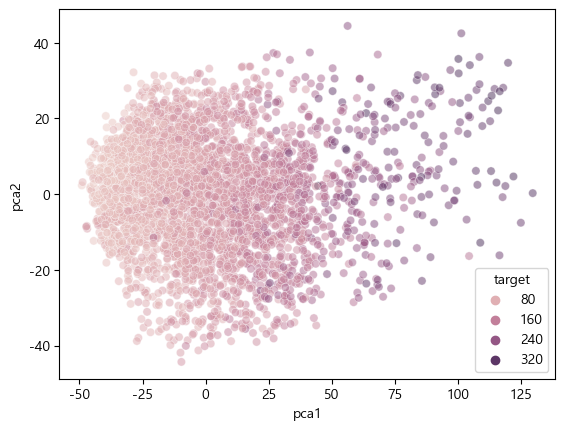

In [154]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x="pca1", y="pca2", hue='target', data=pca_train_df, alpha=0.5)
plt.show()

In [170]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation_msle(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

In [205]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, R2))

In [155]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)

pca_train = pca.fit_transform(train_df.iloc[:, :-1])
pca_test = pca.fit_transform(test_df.iloc[:, :-1])

print(pca_train.shape, pca_test.shape)

(3745, 5) (937, 5)


In [156]:
pca_columns = [f'pca{i + 1}' for i in range(pca_train.shape[1])]
pca_train_df = pd.DataFrame(pca_train, columns=pca_columns)
pca_train_df.loc[:, 'target'] = train_df['AQI']

pca_columns = [f'pca{i + 1}' for i in range(pca_test.shape[1])]
pca_test_df = pd.DataFrame(pca_test, columns=pca_columns)
pca_test_df.loc[:, 'target'] = test_df['AQI']

In [157]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.61477236 0.1324846  0.11115026 0.06515753 0.03483094]
0.9583956943079917


In [159]:
pca_test_df

,pca1,pca2,pca3,pca4,pca5,target
0,15.734104,18.806479,-10.560296,-12.267558,1.464904,104.0
1,-40.412096,-12.346781,4.670086,2.368403,-3.648899,35.0
2,-16.717429,24.340137,-2.336473,-2.373092,1.173449,69.0
3,-28.866280,10.984724,3.091479,3.850989,16.431379,45.0
4,79.119651,-10.871472,-9.423505,3.131716,5.027037,254.0
...,...,...,...,...,...,...
932,-28.328871,17.225522,-7.689990,6.090239,4.793094,84.0
933,45.599442,-4.826648,-1.415732,-15.522665,-6.083963,228.0
934,-11.240296,-13.663296,-11.863069,17.242501,-4.169333,86.0
935,-16.896776,32.781642,13.766678,15.632118,4.802971,97.0


In [160]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split

features, targets = pca_train_df.iloc[:, :-1], pca_train_df.iloc[:, -1]
X_test, y_test = pca_test_df.iloc[:, :-1], pca_test_df.iloc[:, -1]

dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=1000)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]
for model in models:
    model.fit(features, targets)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 1117.0352, RMSE: 33.4221, MSLE: 0.0816, RMSLE: 0.2856, R2: 0.6897
RandomForestRegressor
MSE: 515.8024, RMSE: 22.7113, MSLE: 0.0434, RMSLE: 0.2082, R2: 0.8567
GradientBoostingRegressor
MSE: 497.2766, RMSE: 22.2997, MSLE: 0.0413, RMSLE: 0.2032, R2: 0.8619
XGBRegressor
MSE: 582.7489, RMSE: 24.1402, MSLE: 0.0480, RMSLE: 0.2191, R2: 0.8381
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000734 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 3745, number of used features: 5
[LightGBM] [Info] Start training from score 110.628838
LGBMRegressor
MSE: 514.9218, RMSE: 22.6919, MSLE: 0.0406, RMSLE: 0.2016, R2: 0.8570


점수가 제일 잘 나온 모델을 기준으로 파이프라인 구축

In [174]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA

features, targets = pca_train_df.iloc[:, :-1], pca_train_df.iloc[:, -1]
X_test, y_test = pca_test_df.iloc[:, :-1], pca_test_df.iloc[:, -1]

gb_r = GradientBoostingRegressor(random_state=124)
pipe = Pipeline([('std', StandardScaler()), ('pca', PCA(n_components=5)), ('gb_r', gb_r)])

parameters = {
    'gb_r__learning_rate' : [0.01, 0.1, 0.5],
    'gb_r__n_estimators' : [50, 100, 200]
}

grid_pipe = GridSearchCV(pipe, param_grid=parameters, cv=5)
grid_pipe.fit(features, targets)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('std', StandardScaler()),
                                       ('pca', PCA(n_components=5)),
                                       ('gb_r',
                                        GradientBoostingRegressor(random_state=124))]),
             param_grid={'gb_r__learning_rate': [0.01, 0.1, 0.5],
                         'gb_r__n_estimators': [50, 100, 200]})

In [178]:
X_test

,pca1,pca2,pca3,pca4,pca5
0,15.734104,18.806479,-10.560296,-12.267558,1.464904
1,-40.412096,-12.346781,4.670086,2.368403,-3.648899
2,-16.717429,24.340137,-2.336473,-2.373092,1.173449
3,-28.866280,10.984724,3.091479,3.850989,16.431379
4,79.119651,-10.871472,-9.423505,3.131716,5.027037
...,...,...,...,...,...
932,-28.328871,17.225522,-7.689990,6.090239,4.793094
933,45.599442,-4.826648,-1.415732,-15.522665,-6.083963
934,-11.240296,-13.663296,-11.863069,17.242501,-4.169333
935,-16.896776,32.781642,13.766678,15.632118,4.802971


In [175]:
result_df = pd.DataFrame(grid_pipe.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'gb_r__learning_rate': 0.01, 'gb_r__n_estimat...",0.392927,9
1,"{'gb_r__learning_rate': 0.01, 'gb_r__n_estimat...",0.579464,8
2,"{'gb_r__learning_rate': 0.01, 'gb_r__n_estimat...",0.732466,7
3,"{'gb_r__learning_rate': 0.1, 'gb_r__n_estimato...",0.820788,3
4,"{'gb_r__learning_rate': 0.1, 'gb_r__n_estimato...",0.831397,2
5,"{'gb_r__learning_rate': 0.1, 'gb_r__n_estimato...",0.832981,1
6,"{'gb_r__learning_rate': 0.5, 'gb_r__n_estimato...",0.803528,4
7,"{'gb_r__learning_rate': 0.5, 'gb_r__n_estimato...",0.798064,5
8,"{'gb_r__learning_rate': 0.5, 'gb_r__n_estimato...",0.789233,6


In [179]:
gb_r = grid_pipe.best_estimator_
prediction = gb_r.predict(X_test)

In [180]:
get_evaluation(y_test, prediction)

MSE: 550.6860, RMSE: 23.4667, MSLE: 0.0430, RMSLE: 0.2074, R2: 0.8470


In [181]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA

features, targets = pca_train_df.iloc[:, :-1], pca_train_df.iloc[:, -1]
X_test, y_test = pca_test_df.iloc[:, :-1], pca_test_df.iloc[:, -1]

gb_r = GradientBoostingRegressor(random_state=124)
pipe = Pipeline([('pca', PCA(n_components=5)), ('gb_r', gb_r)])

parameters = {
    'gb_r__learning_rate' : [0.01, 0.1, 0.5],
    'gb_r__n_estimators' : [50, 100, 200]
}

grid_pipe = GridSearchCV(pipe, param_grid=parameters, cv=5)
grid_pipe.fit(features, targets)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca', PCA(n_components=5)),
                                       ('gb_r',
                                        GradientBoostingRegressor(random_state=124))]),
             param_grid={'gb_r__learning_rate': [0.01, 0.1, 0.5],
                         'gb_r__n_estimators': [50, 100, 200]})

In [182]:
result_df = pd.DataFrame(grid_pipe.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'gb_r__learning_rate': 0.01, 'gb_r__n_estimat...",0.514167,9
1,"{'gb_r__learning_rate': 0.01, 'gb_r__n_estimat...",0.709121,8
2,"{'gb_r__learning_rate': 0.01, 'gb_r__n_estimat...",0.816521,7
3,"{'gb_r__learning_rate': 0.1, 'gb_r__n_estimato...",0.845958,3
4,"{'gb_r__learning_rate': 0.1, 'gb_r__n_estimato...",0.847083,2
5,"{'gb_r__learning_rate': 0.1, 'gb_r__n_estimato...",0.848308,1
6,"{'gb_r__learning_rate': 0.5, 'gb_r__n_estimato...",0.838090,4
7,"{'gb_r__learning_rate': 0.5, 'gb_r__n_estimato...",0.832061,5
8,"{'gb_r__learning_rate': 0.5, 'gb_r__n_estimato...",0.821852,6


In [183]:
gb_r = grid_pipe.best_estimator_
prediction = gb_r.predict(X_test)

In [184]:
get_evaluation(y_test, prediction)

MSE: 506.1712, RMSE: 22.4982, MSLE: 0.0413, RMSLE: 0.2032, R2: 0.8594


과적합 판단

In [195]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA

# 훈련 데이터와 테스트 데이터 분리
features_train, targets_train = pca_train_df.iloc[:, :-1], pca_train_df.iloc[:, -1]
features_test, targets_test = pca_test_df.iloc[:, :-1], pca_test_df.iloc[:, -1]

features_train_train, features_val_train, targets_train_train, targets_val_train = \
train_test_split(features_train, targets_train, test_size=0.2, random_state=124)

# GradientBoostingRegressor와 PCA를 사용한 파이프라인 정의
gb_r = GradientBoostingRegressor(random_state=124)
pipe = Pipeline([('pca', PCA(n_components=5)), ('gb_r', gb_r)])

kfold = KFold(n_splits=5, shuffle=True, random_state=124)

# 그리드 서치를 통한 하이퍼파라미터 튜닝
parameters = {
    'gb_r__learning_rate': [0.01, 0.1, 0.5],
    'gb_r__n_estimators': [50, 100, 200]
}

grid_search = GridSearchCV(pipe, param_grid=parameters, cv=kfold)
grid_search.fit(features_train_train, targets_train_train)


GridSearchCV(cv=KFold(n_splits=5, random_state=124, shuffle=True),
             estimator=Pipeline(steps=[('pca', PCA(n_components=5)),
                                       ('gb_r',
                                        GradientBoostingRegressor(random_state=124))]),
             param_grid={'gb_r__learning_rate': [0.01, 0.1, 0.5],
                         'gb_r__n_estimators': [50, 100, 200]})

In [196]:
# 최적의 하이퍼파라미터 출력
print("Best parameters:", grid_search.best_params_)


Best parameters: {'gb_r__learning_rate': 0.1, 'gb_r__n_estimators': 100}


In [201]:
gb_r = grid_search.best_estimator_
prediction_train = gb_r.predict(features_train_train)

In [202]:
get_evaluation(targets_train_train, prediction_train)

MSE: 355.0048, RMSE: 18.8416, MSLE: 0.0321, RMSLE: 0.1791, R2: 0.8916


In [203]:
prediction_val = gb_r.predict(features_val_train)
get_evaluation(targets_val_train, prediction_val)

MSE: 428.6930, RMSE: 20.7049, MSLE: 0.0360, RMSLE: 0.1898, R2: 0.8578


과적합 검증 결과, 과적합이 발생하지 않았다고 판단할 수 있었다.

테스트 데이터 평가

In [212]:
prediction = gb_r.predict(features_test)
get_evaluation(targets_test, prediction)

MSE: 235.6899, RMSE: 15.3522, R2: 0.9345


MSE: 361.1304, RMSE: 19.0034, R2: 0.8879


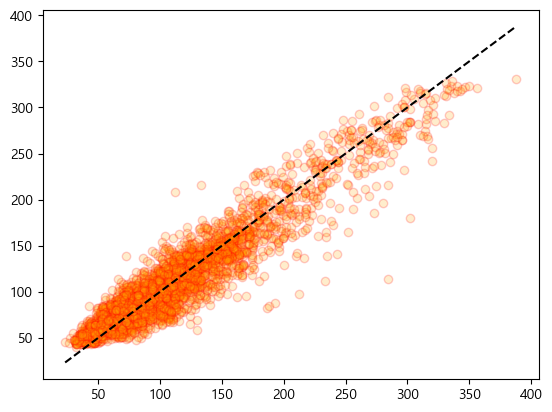

In [209]:
import matplotlib.pyplot as plt

gb_r.fit(features_train, targets_train)
prediction = gb_r.predict(features_train)
get_evaluation(targets_train, prediction)

fig, ax = plt.subplots()
ax.scatter(targets_train, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([targets_train.min(), targets_train.max()], [targets_train.min(), targets_train.max()], 'k--')
plt.show()

MSE: 235.6899, RMSE: 15.3522, R2: 0.9345


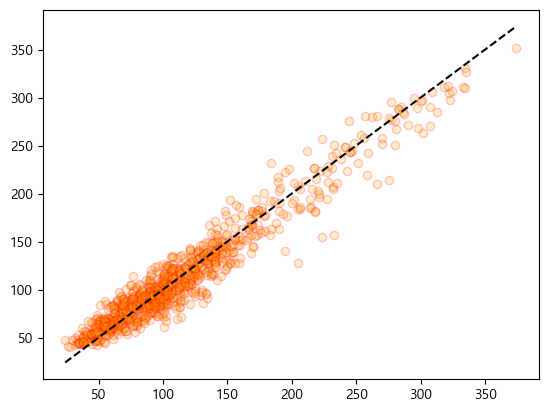

In [210]:
import matplotlib.pyplot as plt

gb_r.fit(features_test, targets_test)
prediction = gb_r.predict(features_test)
get_evaluation(targets_test, prediction)

fig, ax = plt.subplots()
ax.scatter(targets_test, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([targets_test.min(), targets_test.max()], [targets_test.min(), targets_test.max()], 'k--')
plt.show()